In [ ]:
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
import seaborn as sns
from scipy.stats import norm, gaussian_kde

In [ ]:
# Загружаем CSV файл
uploaded = files.upload()

# Читаем CSV (имя берём автоматически)
df = pd.read_csv(list(uploaded.keys())[0], sep="\t")

# Смотрим первые строки
df.head()

Saving data.csv to data (2).csv


,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/14g5kQIq4Mtl3aRZvY_7XQCemeeeTTwWOLMLkwTFxr3E/edit#gid=0


In [ ]:
print(df.isnull().sum())

race       0
age        0
engnat     0
gender     0
hand       0
source     0
country    9
E1         0
E2         0
E3         0
E4         0
E5         0
E6         0
E7         0
E8         0
E9         0
E10        0
N1         0
N2         0
N3         0
N4         0
N5         0
N6         0
N7         0
N8         0
N9         0
N10        0
A1         0
A2         0
A3         0
A4         0
A5         0
A6         0
A7         0
A8         0
A9         0
A10        0
C1         0
C2         0
C3         0
C4         0
C5         0
C6         0
C7         0
C8         0
C9         0
C10        0
O1         0
O2         0
O3         0
O4         0
O5         0
O6         0
O7         0
O8         0
O9         0
O10        0
dtype: int64


In [ ]:
print("Размерность датафрейма:", df.shape)
print("Количество строк:", df.shape[0])
print("Количество столбцов:", df.shape[1])

Размерность датафрейма: (19719, 57)
Количество строк: 19719
Количество столбцов: 57


In [ ]:
# Определяем обратные вопросы
reverse_items = [
    # Extraversion (E)
    'E2', 'E4', 'E6', 'E8', 'E10',
    # Neuroticism (N)
    'N2', 'N4',
    # Agreeableness (A)
    'A1', 'A3', 'A5', 'A7',
    # Conscientiousness (C)
    'C2', 'C4', 'C6', 'C8',
    # Openness (O)
    'O2', 'O4', 'O6'
]

# Реверсируем шкалу 1–5 для этих вопросов
for item in reverse_items:
    if item in df.columns:
        df[item] = 6 - df[item]

# Группируем вопросы по факторам
factors = {
    "Extraversion": [f"E{i}" for i in range(1, 11)],
    "Neuroticism": [f"N{i}" for i in range(1, 11)],
    "Agreeableness": [f"A{i}" for i in range(1, 11)],
    "Conscientiousness": [f"C{i}" for i in range(1, 11)],
    "Openness": [f"O{i}" for i in range(1, 11)]
}

# Агрегируем (находим средний балл по каждому фактору)
for factor, cols in factors.items():
    df[factor] = df[cols].mean(axis=1)

# Проверим результат
print(df[["Extraversion", "Neuroticism", "Agreeableness", "Conscientiousness", "Openness"]].head())

   Extraversion  Neuroticism  Agreeableness  Conscientiousness  Openness
0           4.4          1.1            4.6                4.7       4.3
1           2.2          3.1            3.5                4.2       2.6
2           3.5          4.6            3.8                4.9       4.5
3           2.2          4.3            3.7                2.6       4.1
4           3.4          3.0            4.4                3.4       3.4


In [ ]:
df.head()

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O6,O7,O8,O9,O10,Extraversion,Neuroticism,Agreeableness,Conscientiousness,Openness
0,3,53,1,1,1,1,US,4,4,5,...,5,4,2,5,5,4.4,1.1,4.6,4.7,4.3
1,13,46,1,2,1,1,US,2,4,3,...,3,3,1,3,2,2.2,3.1,3.5,4.2,2.6
2,1,14,2,2,1,1,PK,5,5,1,...,5,5,5,5,5,3.5,4.6,3.8,4.9,4.5
3,3,19,2,2,1,1,RO,2,1,2,...,4,5,2,5,5,2.2,4.3,3.7,2.6,4.1
4,11,25,2,2,1,2,US,3,5,3,...,5,3,1,5,3,3.4,3.0,4.4,3.4,3.4


In [ ]:
# Выбираем данные для анализа
data = np.sort(df["Extraversion"])

In [ ]:
# Расчет количества интервалов по формуле Стерджесса
n = len(data)
k = int(1 + 3.322 * math.log10(n))
print(f"Количество интервалов по формуле Стерджесса: k = {k}")

# --- 3. Определяем границы интервалов ---
x_min, x_max = data.min(), data.max()
h = (x_max - x_min) / k  # ширина интервала
bins = np.arange(x_min, x_max + h, h)

Количество интервалов по формуле Стерджесса: k = 15


In [ ]:
# 4. Формируем интервальный вариационный ряд
# Частоты в каждом интервале
counts, edges = np.histogram(data, bins=bins)

# Относительные частоты
rel_freq = counts / n

# Сводная таблица
interval_table = pd.DataFrame({
    "Интервал": [f"[{edges[i]:.2f}; {edges[i+1]:.2f})" for i in range(len(edges)-1)],
    "Абсолютная частота": counts,
    "Относительная частота": rel_freq
})
print("\nИнтервальный вариационный ряд:")
print(interval_table)


Интервальный вариационный ряд:
        Интервал  Абсолютная частота  Относительная частота
0   [1.00; 1.27)                 495               0.025103
1   [1.27; 1.53)                 742               0.037629
2   [1.53; 1.80)                 676               0.034282
3   [1.80; 2.07)                1380               0.069983
4   [2.07; 2.33)                1732               0.087834
5   [2.33; 2.60)                1384               0.070186
6   [2.60; 2.87)                2187               0.110908
7   [2.87; 3.13)                2308               0.117044
8   [3.13; 3.40)                1461               0.074091
9   [3.40; 3.67)                2052               0.104062
10  [3.67; 3.93)                1821               0.092347
11  [3.93; 4.20)                1027               0.052082
12  [4.20; 4.47)                1248               0.063289
13  [4.47; 4.73)                 783               0.039708
14  [4.73; 5.00)                 315               0.015974


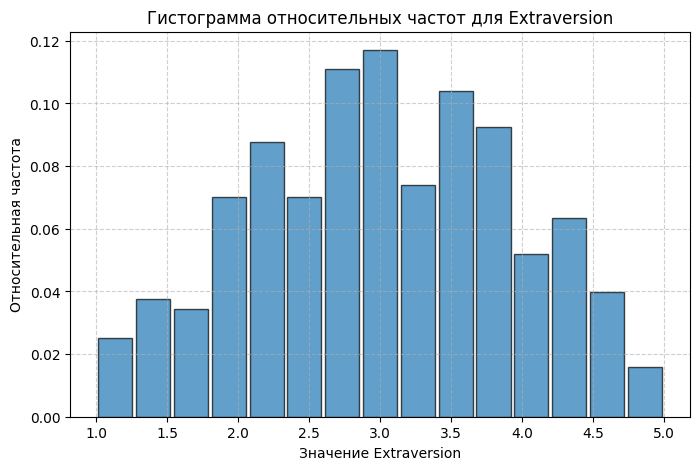

In [ ]:
# Гистограмма относительных частот
midpoints = 0.5 * (edges[1:] + edges[:-1])
plt.figure(figsize=(8, 5))
plt.bar(midpoints, rel_freq, width=h*0.9, edgecolor='black', alpha=0.7)
plt.title("Гистограмма относительных частот для Extraversion")
plt.xlabel("Значение Extraversion")
plt.ylabel("Относительная частота")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

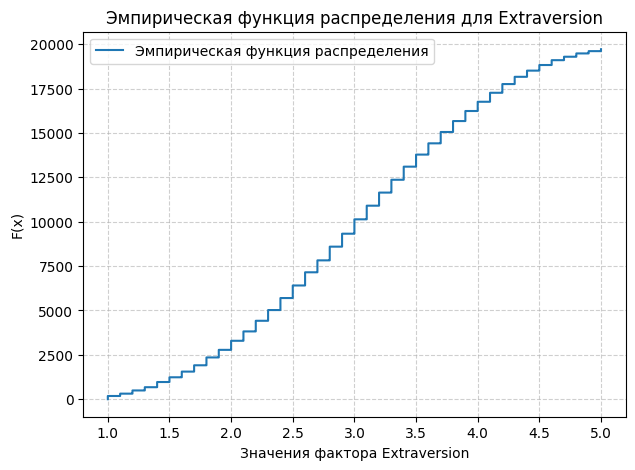

In [ ]:
# Эмпирическая функция распределения
y = np.arange(1, n+1)
plt.figure(figsize=(7,5))
plt.step(data, y, where='post', label='Эмпирическая функция распределения')
plt.title('Эмпирическая функция распределения для Extraversion')
plt.xlabel('Значения фактора Extraversion')
plt.ylabel('F(x)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:

mean = data.mean()
var = data.var(ddof=1)
std = data.std(ddof=1)
cv = (std / mean) * 100
print(f"\nВыборочное среднее: {mean:.4f}")
print(f"Выборочная дисперсия: {var:.4f}")
print(f"Выборочное среднеквадратическое отклонение: {std:.4f}")
print(f"Коэффициент вариации: {cv:.2f}%")


Выборочное среднее: 3.0113
Выборочная дисперсия: 0.8507
Выборочное среднеквадратическое отклонение: 0.9223
Коэффициент вариации: 30.63%


In [ ]:
# Метод моментов
mu_mom = np.mean(data)
sigma2_mom = np.var(data, ddof=0)

# Метод максимального правдоподобия (для нормального распределения совпадает с ММ)
mu_mle = np.mean(data)
sigma2_mle = np.mean((data - mu_mle)**2)

# Байесовская оценка при неинформативном априорном распределении
mu_bayes = np.mean(data)
sigma2_bayes = np.var(data, ddof=1)

print(f"Метод моментов: mu = {mu_mom:.4f}, sigma^2 = {sigma2_mom:.4f}")
print(f"Метод максимального правдоподобия: mu = {mu_mle:.4f}, sigma^2 = {sigma2_mle:.4f}")
print(f"Байесовская оценка: mu = {mu_bayes:.4f}, sigma^2 = {sigma2_bayes:.4f}")

Метод моментов: mu = 3.0113, sigma^2 = 0.8506
Метод максимального правдоподобия: mu = 3.0113, sigma^2 = 0.8506
Байесовская оценка: mu = 3.0113, sigma^2 = 0.8507


In [ ]:
median_value = np.median(data)
print(f"Медиана: {median_value:.3f}")

Медиана: 3.000


In [ ]:
mode_value = df["Extraversion"].mode()[0]
print(f"Мода: {mode_value:.3f}")

Мода: 3.000


In [ ]:
mean_value = np.mean(data)
print(f"Математическое ожидание: {mean_value:.3f}")

Математическое ожидание: 3.011


In [ ]:
variance_value = data.var(ddof=1)
print(f"Дисперсия: {variance_value:.3f}")

Дисперсия: 0.851


In [ ]:
std_value = np.sqrt(variance_value)
print(f"Среднеквадратическое отклонение: {std_value:.3f}")

Среднеквадратическое отклонение: 0.922


In [ ]:
alpha = 0.05

t_crit = stats.t.ppf(1 - alpha/2, df=n-1)
mean_left = mean_value - t_crit * std_value / np.sqrt(n)
mean_right = mean_value + t_crit * std_value / np.sqrt(n)
print(f"ДИ для мат ожидания: "f"({mean_left:.3f}; {mean_right:.3f})")

chi2_left = stats.chi2.ppf(alpha/2, df=n-1)
chi2_right = stats.chi2.ppf(1 - alpha/2, df=n-1)
var_left = (n - 1) * variance_value / chi2_right
var_right = (n - 1) * variance_value / chi2_left

print(f"ДИ для дисперсии: "f"({var_left:.3f}; {var_right:.3f})")

ДИ для мат ожидания: (2.998; 3.024)
ДИ для дисперсии: (0.834; 0.868)


In [ ]:
counts = interval_table["Абсолютная частота"].values
p = counts / counts.sum()
entropy = -np.sum(p * np.log(p + 1e-9))
print(f"Энтропия: {entropy:.4f}")

Энтропия: 2.5925


In [ ]:
n = len(data)
A = stats.skew(data)
E = stats.kurtosis(data, fisher=True)

J = (n/6) * A**2 + (n/24) * E**2

print(f"Асимметрия A = {A:.3f}")
print(f"Эксцесс E = {E:.3f}")
print(f"Критерий Ястремского J = {J:.3f}")

Асимметрия A = -0.038
Эксцесс E = -0.714
Критерий Ястремского J = 423.114


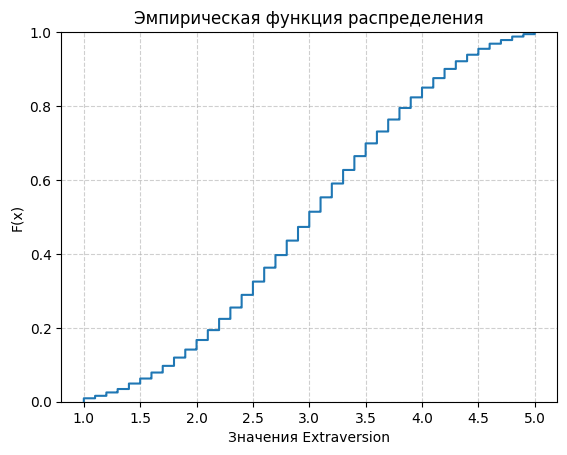

In [ ]:
sns.ecdfplot(data)
plt.title("Эмпирическая функция распределения")
plt.xlabel("Значения Extraversion")
plt.ylabel("F(x)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

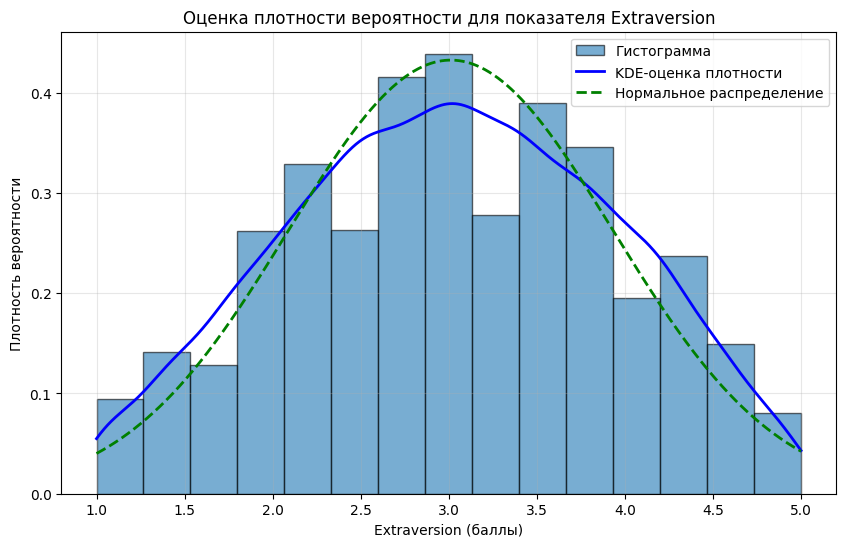

In [ ]:
mu = np.mean(data)
sigma = np.std(data, ddof=1)

# === KDE оценка ===
kde = gaussian_kde(data)
x_grid = np.linspace(data.min(), data.max(), 1000)

# === Построение графика ===
plt.figure(figsize=(10, 6))

# Гистограмма плотности
plt.hist(data, bins=15, density=True, alpha=0.6, edgecolor='black', label='Гистограмма')

# KDE оценка плотности
plt.plot(x_grid, kde(x_grid), 'b-', lw=2, label='KDE-оценка плотности')

# Нормальное распределение (по выборочным параметрам)
plt.plot(x_grid, norm.pdf(x_grid, mu, sigma), 'g--', lw=2,
         label='Нормальное распределение')

# Оформление графика
plt.xlabel("Extraversion (баллы)")
plt.ylabel("Плотность вероятности")
plt.title("Оценка плотности вероятности для показателя Extraversion")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
from statsmodels.stats.power import TTestPower
mu0 = 3
alpha = 0.05
t_stat, p_value = stats.ttest_1samp(data, popmean=mu0)
t_crit = stats.t.ppf(1 - alpha/2, df=n-1)
effect_size = (mean_value - mu0) / std_value
power = TTestPower().power(effect_size=effect_size, nobs=n, alpha=alpha, alternative='two-sided')
beta = 1 - power
print(f"t-статистика: {t_stat:.3f}")
print(f"p-значение: {p_value:.3f}")
print(f"Критическое значение t: ±{t_crit:.3f}")
print(f"Размер эффекта (Cohen's d): {effect_size:.3f}")
print(f"Мощность теста: {power:.3f}")
print(f"Вероятность ошибки II рода (beta): {beta:.3f}")

t-статистика: 1.725
p-значение: 0.085
Критическое значение t: ±1.960
Размер эффекта (Cohen's d): 0.012
Мощность теста: 0.407
Вероятность ошибки II рода (beta): 0.593


In [ ]:
from statsmodels.stats.power import TTestIndPower
male = df[df['gender'] == 1]['Extraversion'].dropna()
female = df[df['gender'] == 2]['Extraversion'].dropna()
t_stat, p_two_sided = stats.ttest_ind(female, male, equal_var=True)
p_value = p_two_sided / 2 if t_stat > 0 else 1 - p_two_sided / 2
alpha = 0.05
effect_size = (np.mean(female) - np.mean(male)) / np.std(df['Extraversion'], ddof=1)
ratio = len(male) / len(female)
power = TTestIndPower().power(effect_size=effect_size, nobs1=len(female), ratio=ratio, alpha=alpha, alternative='larger')
beta = 1 - power
crit_t = stats.t.ppf(1 - alpha, df=len(female) + len(male) - 2)
print(f"t-статистика: {t_stat:.3f}")
print(f"p-значение: {p_value:.3f}")
print(f"Критическое значение t: ±{t_crit:.3f}")
print(f"Размер эффекта (Cohen's d): {effect_size:.3f}")
print(f"Мощность теста: {power:.3f}")
print(f"Вероятность ошибки II рода (beta): {beta:.3f}")


t-статистика: 7.283
p-значение: 0.000
Критическое значение t: ±1.960
Размер эффекта (Cohen's d): 0.107
Мощность теста: 1.000
Вероятность ошибки II рода (beta): 0.000


In [ ]:
extraversion = df['Extraversion'].dropna()
openness = df['Openness'].dropna()
n = len(extraversion)
r, p_value = stats.pearsonr(extraversion, openness)
t_stat = r * np.sqrt((n - 2) / (1 - r**2))
alpha = 0.05
t_crit = stats.t.ppf(1 - alpha/2, df=n-2)
effect_size = 2 * r / np.sqrt(1 - r**2)
power = TTestPower().power(effect_size=effect_size, nobs=n, alpha=alpha, alternative='two-sided')
beta = 1 - power
print(f"t-статистика: {t_stat:.3f}")
print(f"p-значение: {p_value:.3f}")
print(f"Критическое значение t: ±{t_crit:.3f}")
print(f"Размер эффекта (Cohen's d): {effect_size:.3f}")
print(f"Мощность теста: {power:.3f}")
print(f"Вероятность ошибки II рода (beta): {beta:.3f}")

t-статистика: 23.648
p-значение: 0.000
Критическое значение t: ±1.960
Размер эффекта (Cohen's d): 0.337
Мощность теста: 1.000
Вероятность ошибки II рода (beta): 0.000
